In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from collections import OrderedDict
import random
from PyAstronomy import pyasl
%matplotlib widget

### Reading Data

In [2]:
Data = pd.read_csv('data.csv',header=None)
Atoms = Data.iloc[:,0].values
serial = 0
index = []
for i in range(len(Atoms)):
    if Atoms[i].isdigit()==True:
        serial+=1/2
        if serial.is_integer()==True:
            index.append(i)

### Storing Data And Counting Atoms

In [3]:
AtomData = []
NonH = []

for i in range(len(index)-1):
    NH = 0
    AtomData.append(Data.iloc[index[i]+1:index[i+1]-1, 0:4].values)
    for j in range(index[i]+1,index[i+1]-1):
        if Atoms[j]!="H":NH+=1
            
    NonH.append(NH)
    
AtomData = np.array(AtomData,dtype=object)

### Distribution of Non H atoms in Data

Elements in dictionary :\
1st element - no. of H atoms in a molecules\
2nd element - no. of molecules containting that no. of H atoms

In [4]:
NonHCounts = {i:NonH.count(i) for i in NonH}
NonHCounts # 1st element - no. of Non H atoms in a molecules
            # 2nd element - no. of molecules containting that no. of Non H atoms

{1: 1, 2: 3, 3: 12, 4: 43, 5: 157, 6: 935, 7: 5950}

### Number of molecule containing 4 or less non H atoms

In [5]:
N = sum(NonHCounts[i] for i in range(1,5))
# sort = lambda molecule : len(molecule) # sorting by number of atoms
# sorted(AtomData[N:],key=sort)

### Selecting 1 K molecules

i) First N (ie 59) molecules selected from atom data and then 1000-N (ie 941) molecules selected at random to make Training Data.

ii) Random molecules are selcted by creating mask for less than $\frac{1000-N}{len(AtomData[N:]}$ (ie 0.13362681056518036*100 % data which is 941 molecules) 

iii) Remainng Data is selected using the same mask

In [6]:
p = (1000-N)/len(AtomData[N:]) # to select 941 molecules
mask = np.random.rand(len(AtomData[N:])) < p # < p is fraction of molecules we want to select
                                             # to creat mask for p*100% molecules only
RandomSample = AtomData[N:][mask]
RemainingSample = AtomData[N:][~mask]

In [7]:
AtomDataTrain = np.concatenate((AtomData[0:N],RandomSample),dtype=object)
AtomDataRemaining = RemainingSample

### Representation Matrix

In [97]:
k=1
Mij = np.zeros((len(AtomDataTrain[k]),len(AtomDataTrain[k])))
for i in range(len(AtomDataTrain[k])):
    for j in range(len(AtomDataTrain[k])):
        Zi = pyasl.AtomicNo().getAtomicNo(AtomDataTrain[k][i][0])
        Zj = pyasl.AtomicNo().getAtomicNo(AtomDataTrain[k][j][0])
        if i==j:
            Mij[i][j]=0.5*(Zi*Zj)**(2.4)
            
        else:            
            R1 = AtomDataTrain[k][i][1:]
            R2 = AtomDataTrain[k][j][1:]
            Norm = np.linalg.norm(R1-R2)
            Mij[i][j] = Zi*Zj/Norm

In [127]:
SortList = np.argsort(np.linalg.norm(Mij,axis=0))
MijSorted = Mij[SortList]

In [109]:
NZ = 23-len(AtomDataTrain[k]) # no. of rows and column we want to extend our matrix by
Mij_New = np.lib.pad(MijSorted,(0,NZ), 'constant', constant_values=(0))

In [126]:
VectorRep = Mij_New[np.tril_indices(len(Mij_New),k=0)] # vector representation of lower triangular part,
                                                       # including the diagonal of Mij_New

In [76]:
# Mij[:,0] # column
# Mij[[0,1]]=Mij[[1,0]] # row swap
# Mij[:, [1, 0]] = Mij[:, [0, 1]] # column swap

### Plot Molecule

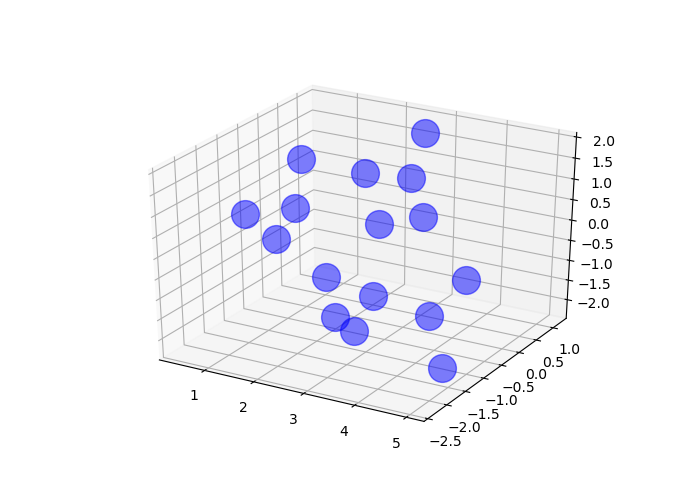

In [128]:
j=500 # jth molecule

fig = plt.figure(figsize =(7, 5))
ax = fig.add_subplot(111,projection ='3d')
for i in range(len(AtomData[j])):
               ax.scatter(AtomData[j][i][1],AtomData[j][i][2],AtomData[j][i][3],s=400,c='blue', alpha=0.5)

In [7]:
H.count(0),H.index(0) # 627th in csv

(1, 620)